가우시안 나이브베이즈 분류기 실습

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
dataset = load_iris()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:"setosa",1:"versicolor",2:"virginica"})
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


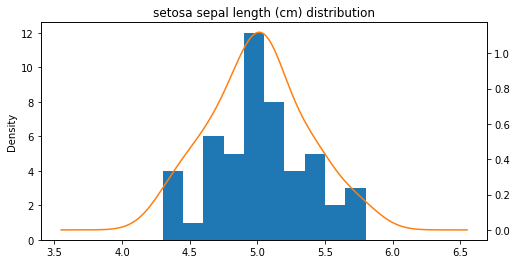

In [5]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target=='versicolor']
virginica_df = df[df.target == 'virginica']

ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',ax=ax,secondary_y=True,
                                    title='setosa sepal length (cm) distribution',figsize=(8,4))

In [6]:
X_train,X_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size=0.2)

model = GaussianNB()
model.fit(X_train,y_train)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test,predicted))

accuracy_score(y_test,predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.77      0.91      0.83        11
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.87      0.87      0.86        30



0.8666666666666667

베르누이 나이브 베이즈 분류기 실습

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [9]:
email_list = [
              {'email title' : 'free game only today', 'spam': True},
              {'email title' : 'cheapest flight deal', 'spam': True},
              {'email title' : 'limited time offer only today today', 'spam': True},
              {'email title' : 'today meeting schedule','spam': False},
              {'email title' : 'your filight schedule attached', 'spam': False},
              {'email title' : 'your credit card statement', 'spam': False},
              ]

In [10]:
df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today today,True
3,today meeting schedule,False
4,your filight schedule attached,False
5,your credit card statement,False


In [11]:
df['label'] = df['spam'].map({True :1,False:0})

In [12]:
df_x = df['email title']
df_y = df['label']

In [13]:
cv = CountVectorizer(binary=True)
X_traincv = cv.fit_transform(df_x)

In [14]:
encoded_input = X_traincv.toarray()

In [15]:
encoded_input

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [16]:
bnb = BernoulliNB()

In [17]:
y_train = df_y.astype('int')
bnb.fit(X_traincv,y_train)

BernoulliNB()

In [20]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x = test_df['email title']
test_y = test_df['label']
x_testcv = cv.transform(test_x)

In [21]:
predictions = bnb.predict(x_testcv)
accuracy_score(test_y,predictions)

0.8333333333333334

* MutinomialNB by 영화 리뷰데이터

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

In [34]:
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [40]:
df['label'] = df['type'].map({'positive':1,'negative':0})

In [41]:
df_x = df["movie_review"]
df_y = df['label']

In [42]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()

In [43]:
mnb = MultinomialNB()
y_train = df_y.astype('int')
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [44]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({'positive':1,'negative':0})
test_x = test_df['movie_review']
test_y = test_df['label']
x_testcv = cv.transform(test_x)
predictions = mnb.predict(x_testcv)